In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = "/content/drive/MyDrive/rice_classification_dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1200 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


In [4]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2726 - loss: 3.0190

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 347s 9s/step - accuracy: 0.2726 - loss: 3.0022 - val_accuracy: 0.3400 - val_loss: 1.9674
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.2655 - loss: 1.8871 - val_accuracy: 0.3733 - val_loss: 1.8048
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.3865 - loss: 1.6958 - val_accuracy: 0.5033 - val_loss: 1.6535
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.4185 - loss: 1.6255 - val_accuracy: 0.5633 - val_loss: 1.5155
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.5072 - loss: 1.5030 - val_accuracy: 0.5400 - val_loss: 1.4516
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.5408 - loss: 1.4491 - val_accuracy: 0.6667 - val_loss: 1.3243
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.6099 - loss: 1.3215 - val_accuracy: 0.6933 - val_loss: 1.1601
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.6011 - loss: 1.2934 - val_accuracy: 0.7600 - val_loss: 1.

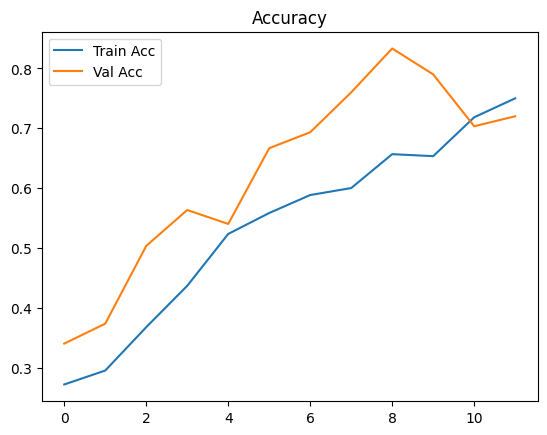

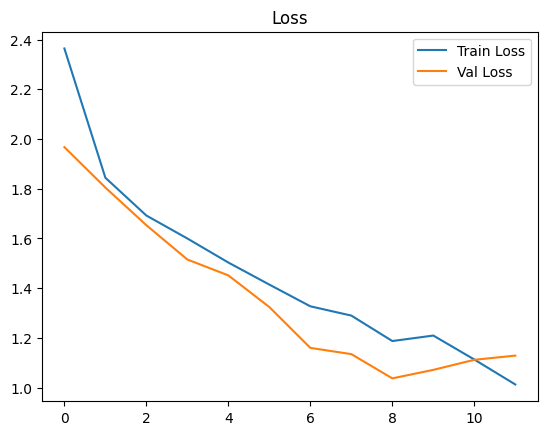

In [7]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

In [13]:
from google.colab import files
uploaded = files.upload()

Saving —Pngtree—3d rice grain_8542575.png to —Pngtree—3d rice grain_8542575.png


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = "—Pngtree—3d rice grain_8542575.png"


img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)


prediction = model.predict(img_array)
predicted_class = train_generator.class_indices
predicted_label = list(predicted_class.keys())[np.argmax(prediction)]

print("Predicted Class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Predicted Class: Ipsala


In [15]:
model.save("/content/drive/MyDrive/rice_model_overfitting_handled.h5")